## Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")
# pd.set_option('max_columns', 200)

In [17]:
df = pd.read_csv("./new_retail_data.csv")

## Step 1: Data Understanding


- Dataframe shape
- head and tail
- dtypes
- describe

In [3]:
df.shape

(302010, 30)

In [4]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [5]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [6]:
df.dtypes

Transaction_ID      float64
Customer_ID         float64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [7]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


# Step 2: Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [8]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [29]:
# Rename columns
df = df.rename(columns={"products": "Products"})

In [32]:
df.isna().sum()

Name               382
Email              347
Phone              362
Address            315
City               248
State              281
Zipcode            340
Country            271
Age                173
Gender             317
Income             290
Date               359
Total_Purchases    361
Amount             357
Total_Amount       350
Product_Brand      281
Product_Type         0
Feedback           184
Order_Status       235
Ratings            184
Products             0
dtype: int64

In [ ]:
# example of dropping columns
# df.drop(["Address"], axis=1)

In [20]:
df = df[[
    # 'Transaction_ID', 'Customer_ID', 
    'Name', 'Email', 'Phone', 'Address',
    'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
    # 'Customer_Segment', 
    'Date', 
    # 'Year', 'Month', 'Time', 
    'Total_Purchases',
    'Amount', 'Total_Amount', 
    # 'Product_Category', 
    'Product_Brand',
    'Product_Type', 'Feedback', 
    # 'Shipping_Method', 'Payment_Method',
    'Order_Status', 'Ratings', 'products'
]].copy()

In [21]:
df.dtypes

Name                object
Email               object
Phone              float64
Address             object
City                object
State               object
Zipcode            float64
Country             object
Age                float64
Gender              object
Income              object
Date                object
Total_Purchases    float64
Amount             float64
Total_Amount       float64
Product_Brand       object
Product_Type        object
Feedback            object
Order_Status        object
Ratings            float64
products            object
dtype: object

In [24]:
pd.to_datetime(df['Date']) 

0        2023-09-18
1        2023-12-31
2        2023-04-26
3        2023-05-08
4        2024-01-10
            ...    
302005   2024-01-20
302006   2023-12-28
302007   2024-02-27
302008   2023-09-03
302009   2024-01-08
Name: Date, Length: 302010, dtype: datetime64[ns]

In [25]:
df['Date']

0          9/18/2023
1         12/31/2023
2          4/26/2023
3           5/8/2023
4          1/10/2024
             ...    
302005     1/20/2024
302006    12/28/2023
302007     2/27/2024
302008      9/3/2023
302009      1/8/2024
Name: Date, Length: 302010, dtype: object

In [34]:
df.loc[df.duplicated()]

,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,...,Date,Total_Purchases,Amount,Total_Amount,Product_Brand,Product_Type,Feedback,Order_Status,Ratings,Products
299759,Christine Kim,James11@gmail.com,2.383778e+09,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.0,Canada,54.0,Female,...,12/10/2023,7.0,134.374182,940.619277,Adidas,T-shirt,Bad,Processing,1.0,Off-the-shoulder tee
299797,Debbie Hill,Richard35@gmail.com,6.547233e+09,704 Sexton Rapids,San Francisco,New Mexico,88083.0,USA,53.0,Female,...,11/27/2023,1.0,178.768334,178.768334,Bed Bath & Beyond,Bedding,Bad,Pending,1.0,Duvet cover
299834,Jeremy Curry,Nancy78@gmail.com,6.329096e+09,66891 Nicole Spur,Toowoomba,New South Wales,70882.0,Australia,68.0,Female,...,3/26/2023,2.0,429.750408,859.500817,Home Depot,Tools,Excellent,Shipped,4.0,Wrench
299849,Elizabeth Miller,Samuel83@gmail.com,3.777423e+09,1133 Thompson Ville,San Antonio,Maryland,21831.0,USA,68.0,Female,...,1/24/2024,1.0,381.833170,381.833170,Bed Bath & Beyond,Bedding,Good,Shipped,3.0,Bed skirt
299877,William Burgess,Christopher35@gmail.com,6.823643e+09,95177 Williams Parkways Suite 003,Portsmouth,England,69722.0,UK,19.0,Male,...,10/17/2023,5.0,487.311398,2436.556989,Penguin Books,Non-Fiction,Good,Pending,4.0,History
300015,Dennis Smith,Nicholas2@gmail.com,9.546419e+09,6374 Scott Plain,Seattle,Iowa,51706.0,USA,58.0,Female,...,5/4/2023,2.0,235.665801,471.331602,Nike,T-shirt,Bad,Processing,1.0,V-neck tee
300201,Jonathan Miller,Erica87@gmail.com,9.538998e+09,7432 Perry Mountain,Sydney,New South Wales,14464.0,Australia,39.0,Male,...,11/11/2023,6.0,233.336083,1400.016498,Samsung,Smartphone,Average,Processing,2.0,Google Pixel
300228,Dr. Elizabeth Spencer,Kathleen41@gmail.com,5.335710e+09,1831 Richardson Knolls,Wuppertal,Berlin,20787.0,Germany,40.0,Male,...,11/2/2023,6.0,276.157852,1656.947115,Samsung,Television,Average,Delivered,2.0,HDR TV
300230,William Small,Mary14@gmail.com,6.299059e+09,937 Ellis Park,Plymouth,England,64469.0,UK,68.0,Male,...,5/9/2023,1.0,376.003306,376.003306,Samsung,Tablet,Average,Delivered,2.0,Amazon Fire Tablet
300240,David Anderson,Gabriel78@gmail.com,5.314789e+09,890 Morales Shores Apt. 394,Kelowna,Ontario,12648.0,Canada,36.0,Female,...,9/26/2023,8.0,18.241648,145.933186,Nike,T-shirt,Bad,Delivered,1.0,Plain tee


In [37]:
df.loc[df.duplicated(subset=["Products"])].head(5)

,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,...,Date,Total_Purchases,Amount,Total_Amount,Product_Brand,Product_Type,Feedback,Order_Status,Ratings,Products
5,Ryan Johnson,Haley12@gmail.com,3.292677e+09,532 Ashley Crest Suite 014,Brisbane,New South Wales,74430.0,Australia,58.0,Female,...,9/21/2023,4.0,296.291806,1185.167224,Apple,Tablet,Good,Pending,4.0,Lenovo Tab
32,Christopher Lopez,Derrick51@gmail.com,9.286274e+09,57136 Martha Common Apt. 654,Portsmouth,England,11531.0,UK,66.0,Male,...,5/22/2023,7.0,344.679185,2412.754296,IKEA,Decorations,Excellent,Processing,5.0,Curtains
39,Susan Thomas,Bonnie80@gmail.com,9.540868e+09,48415 Ferguson Passage,Portsmouth,England,85074.0,UK,65.0,Male,...,10/29/2023,8.0,28.825511,230.604085,Adidas,Shoes,Excellent,Pending,4.0,Running shoes
41,Amanda Decker,Heather92@gmail.com,8.187510e+09,569 James Heights Suite 460,Portsmouth,England,89908.0,UK,64.0,Female,...,3/17/2023,3.0,227.425549,682.276646,Random House,Literature,Good,Pending,4.0,Drama
55,Tony Moon,Brandon73@gmail.com,2.088510e+09,28526 Sanders Spurs,Portsmouth,England,15193.0,UK,24.0,Male,...,6/27/2023,4.0,257.586972,1030.347890,Sony,Headphones,Good,Processing,4.0,Studio headphones


In [38]:
# Checking an example duplicate
df.query('Name == "Ryan Johnson"')

,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,...,Date,Total_Purchases,Amount,Total_Amount,Product_Brand,Product_Type,Feedback,Order_Status,Ratings,Products
5,Ryan Johnson,Haley12@gmail.com,3.292677e+09,532 Ashley Crest Suite 014,Brisbane,New South Wales,74430.0,Australia,58.0,Female,...,9/21/2023,4.0,296.291806,1185.167224,Apple,Tablet,Good,Pending,4.0,Lenovo Tab
3984,Ryan Johnson,Joshua58@gmail.com,4.976782e+09,403 Linda Avenue,Portsmouth,England,28100.0,UK,21.0,Male,...,3/10/2023,6.0,138.963250,833.779502,Zara,Jeans,Average,Pending,2.0,High-waisted jeans
31254,Ryan Johnson,Mark89@gmail.com,1.686386e+09,5678 Angel Burgs,Victoria,Ontario,5352.0,Canada,22.0,Female,...,7/8/2023,5.0,395.987007,1979.935033,Home Depot,Tools,Good,Delivered,4.0,Saw
39935,Ryan Johnson,Kathleen26@gmail.com,5.406340e+09,59829 Katherine Cove Apt. 599,New Orleans,New York,12448.0,USA,22.0,Male,...,8/13/2023,4.0,49.480856,197.923422,IKEA,Lighting,Excellent,Delivered,4.0,Floor lamps
44479,Ryan Johnson,Christopher33@gmail.com,4.133448e+09,25808 Adam Drive Suite 413,Hobart,New South Wales,50491.0,Australia,20.0,Male,...,2/27/2024,6.0,478.525197,2871.151184,Samsung,Television,Bad,Delivered,1.0,Android TV
45136,Ryan Johnson,Steven50@gmail.com,5.806189e+09,575 James Avenue,Toronto,Ontario,54018.0,Canada,20.0,Male,...,7/4/2023,4.0,403.543716,1614.174863,Coca-Cola,Soft Drink,Good,Delivered,3.0,Ginger ale
52056,Ryan Johnson,Zachary45@gmail.com,6.877969e+09,103 John Station Apt. 035,New Orleans,Ohio,44980.0,USA,20.0,Female,...,8/21/2023,3.0,442.127585,1326.382754,Coca-Cola,Water,Good,Pending,4.0,Artesian water
84021,Ryan Johnson,Michelle83@gmail.com,1.838186e+09,7510 Evelyn Trafficway,Chicago,Connecticut,73396.0,USA,34.0,Male,...,10/6/2023,8.0,490.584328,3924.674625,Pepsi,Water,Good,Delivered,3.0,Coconut water
86675,Ryan Johnson,Amy97@gmail.com,4.904947e+09,2947 Brittany Skyway Apt. 078,Chicago,Connecticut,86547.0,USA,34.0,Female,...,7/15/2023,10.0,351.055201,3510.552011,Pepsi,Water,Good,Pending,3.0,Bottled water
92623,Ryan Johnson,Gregory58@gmail.com,6.641060e+09,521 Steven Rapids,Canberra,New South Wales,53917.0,Australia,34.0,Male,...,7/11/2023,9.0,132.905677,1196.151089,Pepsi,Water,Good,Shipped,4.0,Flavored water


In [45]:

df = df.loc[~df.duplicated(subset=["Name", "Email", "State", "Age"])] \
    .reset_index(drop=True).copy()

In [46]:
df.shape

(300943, 21)

# Step 3: Feature Understanding
(Uni-variate Analysis)
- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot


In [47]:
df

,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,...,Date,Total_Purchases,Amount,Total_Amount,Product_Brand,Product_Type,Feedback,Order_Status,Ratings,Products
0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,...,9/18/2023,3.0,108.028757,324.086270,Nike,Shorts,Excellent,Shipped,5.0,Cycling shorts
1,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,...,12/31/2023,2.0,403.353907,806.707815,Samsung,Tablet,Excellent,Processing,4.0,Lenovo Tab
2,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,...,4/26/2023,3.0,354.477600,1063.432799,Penguin Books,Children's,Average,Processing,2.0,Sports equipment
3,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,...,5/8/2023,7.0,352.407717,2466.854021,Home Depot,Tools,Excellent,Processing,4.0,Utility knife
4,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,...,1/10/2024,2.0,124.276524,248.553049,Nestle,Chocolate,Bad,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300938,Angel Hood,Joseph24@gmail.com,2.825445e+09,7593 Joseph Trace Suite 382,Cairns,New South Wales,39837.0,Australia,41.0,Male,...,5/28/2023,6.0,397.452883,2384.717299,Apple,Tablet,Average,Pending,2.0,Amazon Fire Tablet
300939,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,31.0,Male,...,1/20/2024,5.0,194.792597,973.962984,Penguin Books,Fiction,Bad,Processing,1.0,Historical fiction
300940,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,41.0,Male,...,2/27/2024,3.0,60.701761,182.105285,Adidas,Jacket,Average,Shipped,2.0,Parka
300941,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,41.0,Male,...,9/3/2023,1.0,120.834784,120.834784,IKEA,Furniture,Good,Shipped,4.0,TV stand


In [52]:
df["Name"].value_counts()

Michael Smith        143
Michael Johnson      111
Michael Jones        102
Christopher Smith     93
Jennifer Smith        91
                    ... 
Jordan Austin          1
Tina Black             1
Alan Jackson           1
Kenneth Cochran        1
Kayla Stanley          1
Name: Name, Length: 159390, dtype: int64

[Text(0.5, 0, 'Customer Name'), Text(0, 0.5, 'Count')]

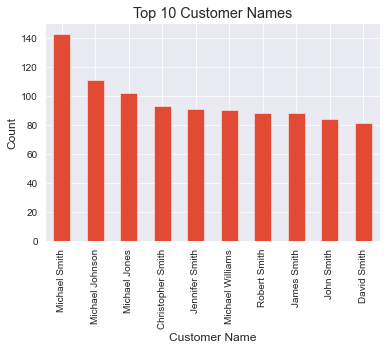

In [60]:
ax = df["Name"].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Customer Names')
ax.set(xlabel='Customer Name', ylabel='Count')

[Text(0.5, 0, 'Ages')]

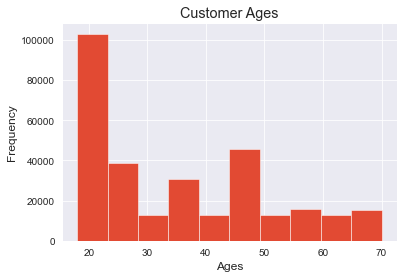

In [65]:
ax = df["Age"].plot(kind='hist', bins=10, title='Customer Ages')
ax.set(xlabel='Ages')

[Text(0.5, 0, 'Ages')]

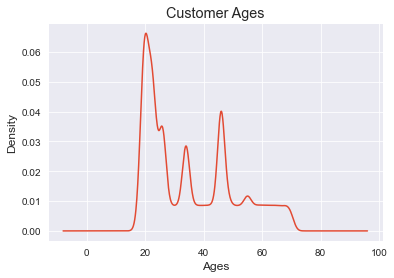

In [67]:
ax = df["Age"].plot(kind='kde', title='Customer Ages')
ax.set(xlabel='Ages')

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

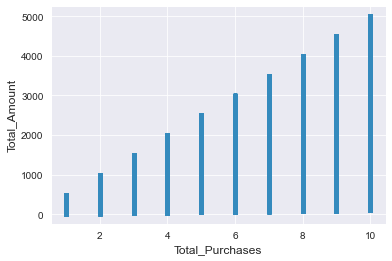

In [82]:
df.plot(kind="scatter", x="Total_Purchases", y="Total_Amount")
plt.show()

<AxesSubplot:xlabel='Total_Purchases', ylabel='Total_Amount'>

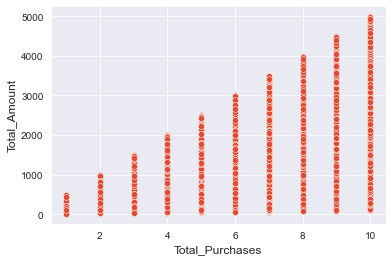

In [83]:
sns.scatterplot(x="Total_Purchases", y="Total_Amount", data=df) 

KeyboardInterrupt: 

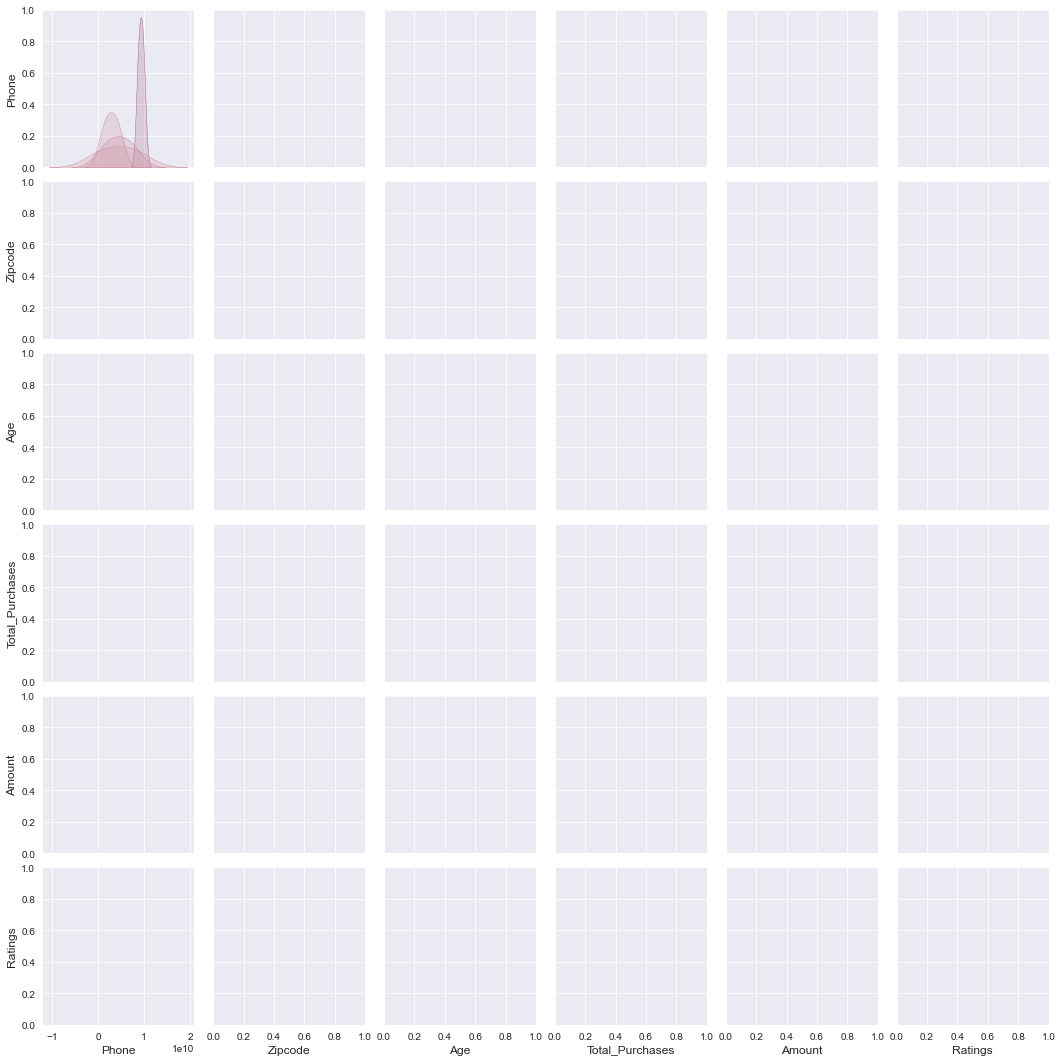

In [85]:
sns.pairplot(df, hue="Total_Amount")